In [1]:
import nflfastpy as npy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Dynamically Load Font `Poppins` - from [Google Fonts](https://fonts.google.com/specimen/Poppins)


In [2]:
font_paths = [
    "../../fonts/Poppins-Regular.ttf",
    "../../fonts/Poppins-Medium.ttf",
    "../../fonts/Poppins-SemiBold.ttf",
    "../../fonts/Poppins-Bold.ttf"
]

for path in font_paths:
    fm.fontManager.addfont(path)
    fm.FontProperties(fname=path)

### Load team color and logo data

In [3]:
df_logos = npy.load_team_logo_data()

### Load 2021 play-by-play data

In [4]:
df = npy.load_pbp_data(2021)

### Only regular season data

In [5]:
df = df[df["season_type"] == "REG"].copy()

### Filter to penalties that occured on 3rd down or 4th down

In [6]:
df_penalty = df[(df["down"].isin([3, 4])) & (df["penalty"] == 1)].copy()

In [7]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
229,LV,BAL,3.0,4,1.0,LV,False Start,6.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
48170,TEN,HOU,3.0,10,1.0,HOU,Defensive Pass Interference,45.0,0.0,1.0
48273,NYG,WAS,4.0,1,1.0,WAS,Neutral Zone Infraction,6.0,0.0,1.0
48291,WAS,NYG,3.0,7,1.0,WAS,False Start,5.0,0.0,0.0
48391,NYG,WAS,4.0,17,1.0,NYG,Fair Catch Interference,15.0,0.0,0.0


### Filter where the offending team was on defense

In [8]:
df_penalty = df_penalty[df_penalty["defteam"] == df_penalty["penalty_team"]].copy()

In [9]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0
176,ARI,TEN,4.0,7,1.0,TEN,Offensive Holding,2.0,0.0,0.0
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
48078,LA,SF,3.0,10,1.0,SF,Defensive Pass Interference,7.0,0.0,1.0
48122,HOU,TEN,4.0,6,1.0,TEN,Illegal Block Above the Waist,6.0,0.0,0.0
48170,TEN,HOU,3.0,10,1.0,HOU,Defensive Pass Interference,45.0,0.0,1.0
48273,NYG,WAS,4.0,1,1.0,WAS,Neutral Zone Infraction,6.0,0.0,1.0


### Find where the yards gained were less than the yards to go but team got a first down

In [10]:
df_penalty = df_penalty[(df_penalty["yards_gained"] < df_penalty["ydstogo"]) & (df_penalty["first_down"] == 1)].copy()

In [11]:
df_penalty["final_pts"] = df_penalty["fixed_drive_result"].apply(lambda x: 6 if x == "Touchdown" else 3 if x == "Field goal" else 0)
df_penalty["td"] = df_penalty["fixed_drive_result"].apply(lambda x: 1 if x == "Touchdown" else 0)
df_penalty["fg"] = df_penalty["fixed_drive_result"].apply(lambda x: 1 if x == "Field goal" else 0)
df_penalty["total_scores"] = df_penalty["td"] + df_penalty["fg"]

In [12]:
df_penalty[[
    "posteam", 
    "defteam", 
    "down", 
    "ydstogo", 
    "penalty", 
    "penalty_team", 
    "penalty_type", 
    "penalty_yards", 
    "yards_gained", 
    "first_down",
    "fixed_drive_result",
    "final_pts",
    "td",
    "fg",
    "total_scores"
]]

,posteam,defteam,down,ydstogo,penalty,penalty_team,penalty_type,penalty_yards,yards_gained,first_down,fixed_drive_result,final_pts,td,fg,total_scores
47,ARI,TEN,3.0,2,1.0,TEN,Defensive Pass Interference,17.0,0.0,1.0,Touchdown,6,1,0,1
249,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,9.0,0.0,1.0,Touchdown,6,1,0,1
271,LV,BAL,3.0,3,1.0,BAL,Unnecessary Roughness,15.0,0.0,1.0,Field goal,3,0,1,1
299,LV,BAL,3.0,2,1.0,BAL,Defensive Pass Interference,32.0,0.0,1.0,Turnover on downs,0,0,0,0
958,NYG,DEN,3.0,7,1.0,DEN,Defensive Pass Interference,5.0,0.0,1.0,Touchdown,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47753,ARI,SEA,4.0,4,1.0,SEA,Neutral Zone Infraction,5.0,0.0,1.0,Field goal,3,0,1,1
48078,LA,SF,3.0,10,1.0,SF,Defensive Pass Interference,7.0,0.0,1.0,Turnover,0,0,0,0
48170,TEN,HOU,3.0,10,1.0,HOU,Defensive Pass Interference,45.0,0.0,1.0,Touchdown,6,1,0,1
48273,NYG,WAS,4.0,1,1.0,WAS,Neutral Zone Infraction,6.0,0.0,1.0,Turnover on downs,0,0,0,0


### Remove entries when there were multiple drive-extending penalties on the same drive

In [13]:
df_filter = df_penalty.groupby(["game_id", "fixed_drive"], as_index=False).agg({"game_seconds_remaining": "min"})
df_penalty_deduped = (
    df_penalty.merge(df_filter, how="inner", on=["game_id", "fixed_drive", "game_seconds_remaining"])
)

In [14]:
df_agg_pos = (
    df_penalty_deduped.groupby("posteam", as_index=False)
    .agg({"first_down": "size", "penalty_yards": "sum", "final_pts": "sum", "td": "sum", "fg": "sum", "total_scores": "sum"})
)

df_agg_def = (
    df_penalty_deduped.groupby("defteam", as_index=False)
    .agg({"first_down": "size", "penalty_yards": "sum", "final_pts": "sum", "td": "sum", "fg": "sum", "total_scores": "sum"})
)

In [17]:
# Get all the logos
for i, team in enumerate(df_agg_pos.posteam):
    im = Image.open(urllib.request.urlopen(df_logos[df_logos["team_abbr"] == team].iloc[0].team_logo_espn))
    im.save(f"./logo-{team}.png")

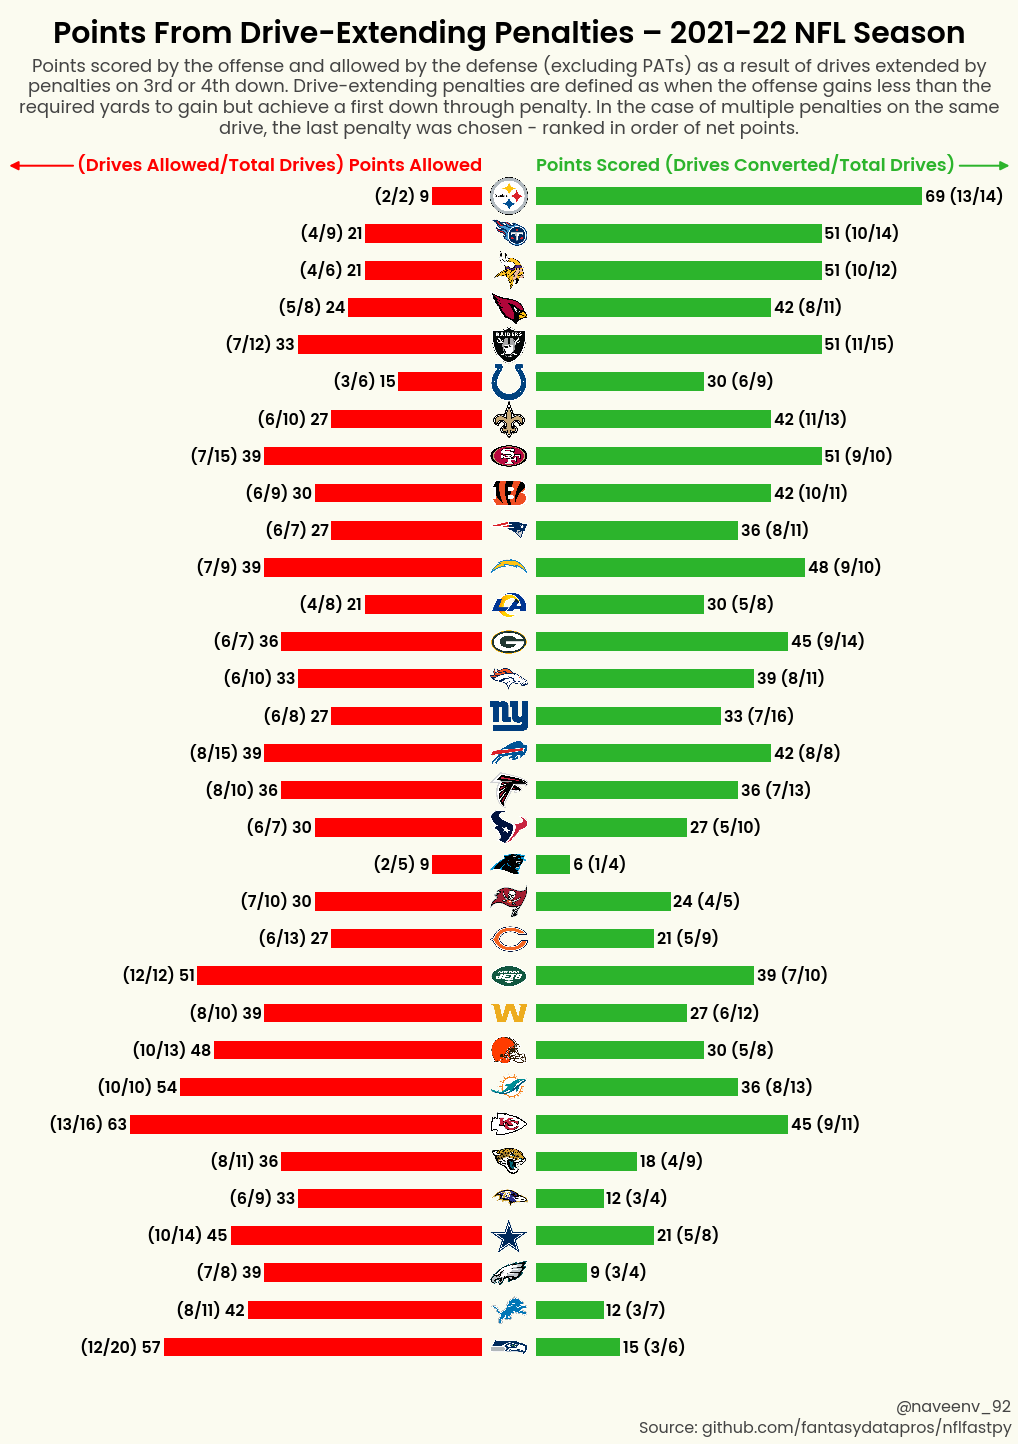

In [18]:
plt.rcParams["font.family"] = "Poppins"
plt.rcParams["font.size"] = 16

fig = plt.figure(figsize=(18, 25), facecolor="#fbfbf0")
gs = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[0.1, 1], width_ratios=[1, 0.1, 1], hspace=0.08, wspace=0.01)

ax_pos = fig.add_subplot(gs[1, 2], frameon=False)
ax_def = fig.add_subplot(gs[1, 0], frameon=False)
ax_logos = fig.add_subplot(gs[1, 1], frameon=False)
ax_title = fig.add_subplot(gs[0, :], frameon=False)

df_temp = (
    df_agg_pos.merge(df_agg_def, left_on="posteam", right_on="defteam", suffixes=("_pos", "_def"))
)
df_temp["net_pts"] = df_temp["final_pts_pos"] - df_temp["final_pts_def"]
df_temp = df_temp.sort_values("net_pts", ascending=False).reset_index(drop=True)

ax_pos.barh(range(df_temp.shape[0]), df_temp["final_pts_pos"], height=0.5, color="#2cb42c")
ax_pos.set(xticks=[], yticks=[], xlim=[0, 85], ylim=[-0.5, 31.5])
ax_pos.invert_yaxis()

ax_def.barh(range(df_temp.shape[0]), df_temp["final_pts_def"], height=0.5, color="#ff0000")
ax_def.set(xticks=[], yticks=[], xlim=[0, 85], ylim=[-0.5, 31.5])
ax_def.invert_xaxis()
ax_def.invert_yaxis()

ax_logos.set(xticks=[], yticks=[], xlim=[0, 1], ylim=[-0.5, 31.5])
ax_logos.invert_yaxis()
for i, team in enumerate(df_temp.posteam):
    # Points Scored
    info_string = f"{df_temp.iloc[i].final_pts_pos} ({df_temp.iloc[i].total_scores_pos}/{df_temp.iloc[i].first_down_pos})"
    ax_pos.text(df_temp.iloc[i].final_pts_pos + 0.5, i, info_string, ha="left", va="center", fontweight=600)
    
    # Points Allowed
    info_string = f"({df_temp.iloc[i].total_scores_def}/{df_temp.iloc[i].first_down_def}) {df_temp.iloc[i].final_pts_def}"
    ax_def.text(df_temp.iloc[i].final_pts_def + 0.5, i, info_string, ha="right", va="center", fontweight=600)
    
    # Logos
    im = np.array(Image.open(f"./logo-{team}.png"))
    xy = [0.5, i]
    imbox = OffsetImage(im, zoom=0.08)
    imbox.image.axes = ax_logos
    
    ab = AnnotationBbox(
        imbox, xy,
        frameon=False
    )
    
    ax_logos.add_artist(ab)
    
# Add Annotations
ax_pos.annotate(
    "Points Scored (Drives Converted/Total Drives)",
    xy=(1, 1.01),
    xytext=(0, 1.01),
    xycoords="axes fraction",
    textcoords="axes fraction",
    va="center",
    fontweight=600,
    fontsize=18,
    color="#2cb42c",
    arrowprops=dict(arrowstyle="-|>", linewidth=2, color="#2cb42c")
)

ax_def.annotate(
    "(Drives Allowed/Total Drives) Points Allowed",
    xy=(0, 1.01),
    xytext=(1, 1.01),
    xycoords="axes fraction",
    textcoords="axes fraction",
    ha="right",
    va="center",
    fontsize=18,
    fontweight=600,
    color="#ff0000",
    arrowprops=dict(arrowstyle="-|>", linewidth=2, color="#ff0000")
)

# Add title section
ax_title.set(xticks=[], yticks=[])
ax_title.text(
    0.5, 0.9, "Points From Drive-Extending Penalties – 2021-22 NFL Season",
    ha="center",
    va="top",
    size=30,
    fontweight=600,
)
ax_title.text(
    0.5, 0.6,
    "Points scored by the offense and allowed by the defense (excluding PATs) as a result of drives extended by\n" + 
    "penalties on 3rd or 4th down. Drive-extending penalties are defined as when the offense gains less than the\n" + 
    "required yards to gain but achieve a first down through penalty. In the case of multiple penalties on the same\n" + 
    "drive, the last penalty was chosen - ranked in order of net points.",
    ha="center",
    va="top",
    size=18,
    color="#444444"
)

# Add source
ax_pos.text(
    1, -0.06,
    "@naveenv_92\nSource: github.com/fantasydatapros/nflfastpy",
    ha="right",
    va="bottom",
    transform=ax_pos.transAxes,
    color="#444444"
)

plt.savefig("third_down_penalties.png", dpi=300, bbox_inches="tight")
plt.show()